<a href="https://colab.research.google.com/github/AnshSharma16/Neural_Networks/blob/main/DigitIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [18]:
from tensorflow.keras.utils import to_categorical

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype('float')/255
x_test=x_test.reshape(-1,28,28,1).astype('float')/255

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [19]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train_cat,epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.8883 - loss: 0.3861 - val_accuracy: 0.9843 - val_loss: 0.0517
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9835 - loss: 0.0547 - val_accuracy: 0.9878 - val_loss: 0.0403
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9890 - val_loss: 0.0393


In [22]:
loss,acc=model.evaluate(x_test,y_test_cat)
print(loss,acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9867 - loss: 0.0416
0.03233762085437775 0.9901000261306763


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


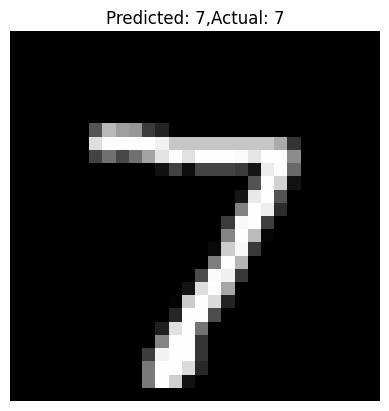

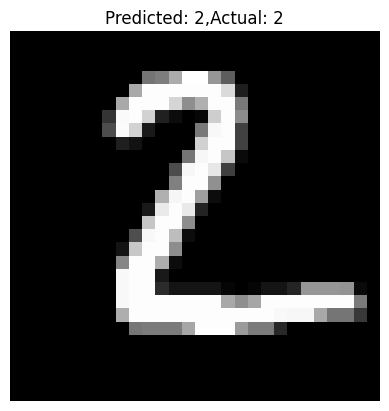

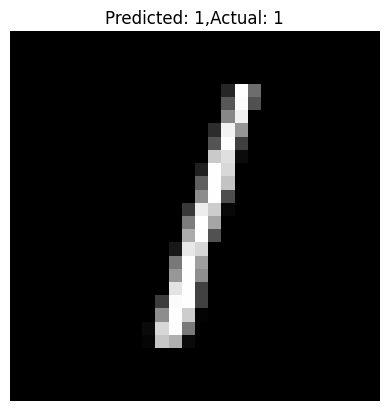

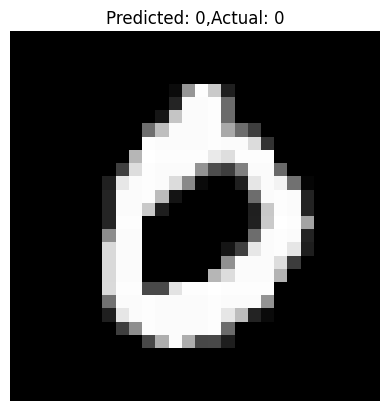

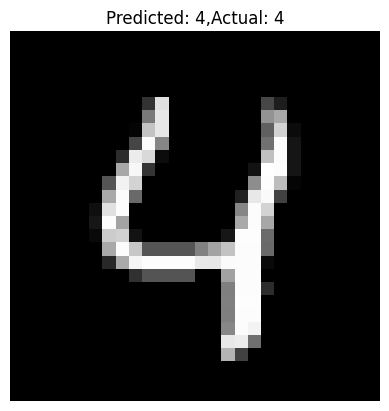

In [23]:
predictions=model.predict(x_test[:5])
predicted_classes=predictions.argmax(axis=-1)

for i in range(5):
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(f"Predicted: {predicted_classes[i]},Actual: {y_test[i]}")
  plt.axis('off')
  plt.show()